In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
%matplotlib inline 

In [2]:
os.chdir('C:/Users/Essam/Desktop/WideBot')

# Investigate Data 

In [3]:
data = pd.read_csv('training.csv',delimiter=';')

In [4]:
data.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3661 non-null   object 
 1   variable2   3661 non-null   object 
 2   variable3   3700 non-null   object 
 3   variable4   3636 non-null   object 
 4   variable5   3636 non-null   object 
 5   variable6   3634 non-null   object 
 6   variable7   3634 non-null   object 
 7   variable8   3700 non-null   object 
 8   variable9   3700 non-null   object 
 9   variable10  3700 non-null   object 
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   object 
 12  variable13  3700 non-null   object 
 13  variable14  3600 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3600 non-null   float64
 16  variable18  1555 non-null   object 
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   object 
dtypes: float64(2), int64(3), ob

View variables distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021181968D48>,
      dtype=object)

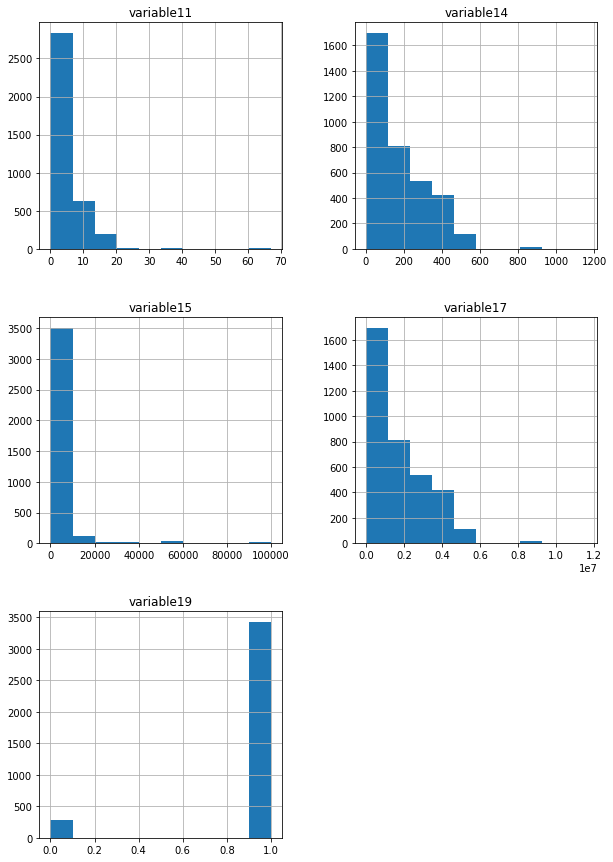

In [6]:
data.hist(figsize=(10,15))

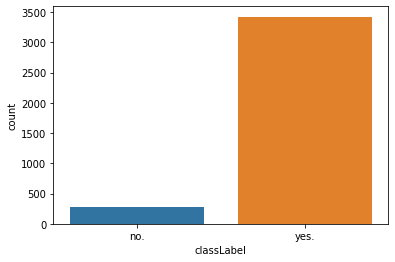

In [7]:
# Plot target column
sns.countplot(x='classLabel',data=data)

In [8]:
data.tail()   

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
3695,a,"18,75","0,00075",u,g,q,v,"2,71",t,t,5,f,g,NaN,26726,NaN,t,1,yes.
3696,a,"23,5",9e-04,u,g,q,v,"8,5",t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
3697,b,"34,17","0,000917",u,g,c,v,"4,5",t,t,12,t,g,0.0,221,0.0,NaN,1,yes.
3698,b,"27,83","0,000154",u,g,W,v,"3,75",t,t,5,t,g,100.0,3,1000000.0,NaN,1,yes.
3699,a,"36,75","0,0005125",u,g,e,v,5,t,f,0,t,g,0.0,4000,0.0,f,1,yes.


Notes : <br>
<br>
1- Variables 2 , 3 and 8 holds multiple values for each record (should be splitted).<br> 
<br>
2- many columns need cleaning.<br>
<br>
3- variable 18 should be dropped as more than half of its values is Null <br> 
<br>
4- I think there is a strong (may be perfect) correlation between variable 19 and classLabel (even distribution looks same for both variables) but still need further exploration in the next section.<br>
<br>
5- majority of target column is yes so accuracy metric probably will decieve us when building model , F1 Score should be better (will get to that later). <br>

# Data Cleaning 

In [9]:
# check the portion of null in each column 
for col in data.columns : 
    print(col)
    print(data[col].isna().sum()/len(data))

variable1
0.01054054054054054
variable2
0.01054054054054054
variable3
0.0
variable4
0.017297297297297298
variable5
0.017297297297297298
variable6
0.01783783783783784
variable7
0.01783783783783784
variable8
0.0
variable9
0.0
variable10
0.0
variable11
0.0
variable12
0.0
variable13
0.0
variable14
0.02702702702702703
variable15
0.0
variable17
0.02702702702702703
variable18
0.5797297297297297
variable19
0.0
classLabel
0.0


so just variable 18 will be dropped and we can handle missing data in the rest 

In [10]:
# check for value count for each column 
for col in data : 
    print(col)
    print(data[col].value_counts())

variable1
b    2382
a    1279
Name: variable1, dtype: int64
variable2
23,25    64
22,67    52
20,42    49
33,17    49
19,17    49
         ..
21,42     1
24,92     1
26,83     1
31,42     1
45,33     1
Name: variable2, Length: 288, dtype: int64
variable3
0            134
3e-04        121
0,00065       98
0,00015       90
5e-04         87
            ... 
0,0001165      1
6,7e-05        1
0,000975       1
0,0019         1
0,0004125      1
Name: variable3, Length: 179, dtype: int64
variable4
u    3055
y     549
l      32
Name: variable4, dtype: int64
variable5
g     3055
p      549
gg      32
Name: variable5, dtype: int64
variable6
c     787
q     612
W     363
cc    343
x     340
aa    210
i     191
m     179
k     170
e     137
ff    136
d      94
j      39
r      33
Name: variable6, dtype: int64
variable7
v     2015
h      970
bb     339
ff     154
z       49
j       37
n       33
dd      20
o       17
Name: variable7, dtype: int64
variable8
0        268
1,5      169
0,04     127
2,5 

We will need clean function that will do the following : <br>
<br>
* drop variable 18 and fill the null in rest of columns by mode (since portion of missing values is small in the rest) <br>
<br> 
* separate each value in complex columns (like variable 2) so that each value will be in a separate row 

In [11]:
# Encode label from [no , yes] to [0,1]
data['classLabel']= data['classLabel'].apply(lambda x : 0 if x=='no.' else 1 )
data['classLabel'].value_counts()

1    3424
0     276
Name: classLabel, dtype: int64

In [12]:
numeric_columns = ['variable2','variable3','variable8','variable11','variable14','variable15',
                   'variable17','variable19','classLabel']
categorical_columns = ['variable1','variable4','variable5','variable6','variable7','variable9','variable10'
                      ,'variable12','variable13']
# define dictionary to save mode of each variable to use it in testing directly 

In [13]:
def explode_columns(data,columns):
    # change each entry in complex columns (variable 2 , variable 3 , variable 8) to list 
    for col in columns : 
        data[col] = data[col].apply(lambda x : str(x).split(','))
    
    # now let's explode (seperate multi values so that each value will be in separate row)
    for col in columns : 
        data = data.explode(col)
    
    return data 


def clean(data): 
    processed_data=data.drop(['variable18'],axis=1)
    # fill NA intially with big negative number 
    processed_data.fillna(-10000,inplace=True)
    processed_data = explode_columns(processed_data,['variable2','variable3','variable8'])
    
    processed_data['variable3']=processed_data['variable3'].astype('float64')
    
    processed_data['variable8']=processed_data['variable8'].astype('int64')

    # fill NA with mode (most occured value)
    for col in processed_data.columns:
        processed_data[col]=processed_data[col].replace(-10000,processed_data[col].mode()[0])
        
    processed_data['variable2']=processed_data['variable2'].astype('int64')   
    return processed_data

In [14]:
cleaned_data = clean(data)

now let's view distribution of columns after cleaning 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021181D02A08>,
      dtype=object)

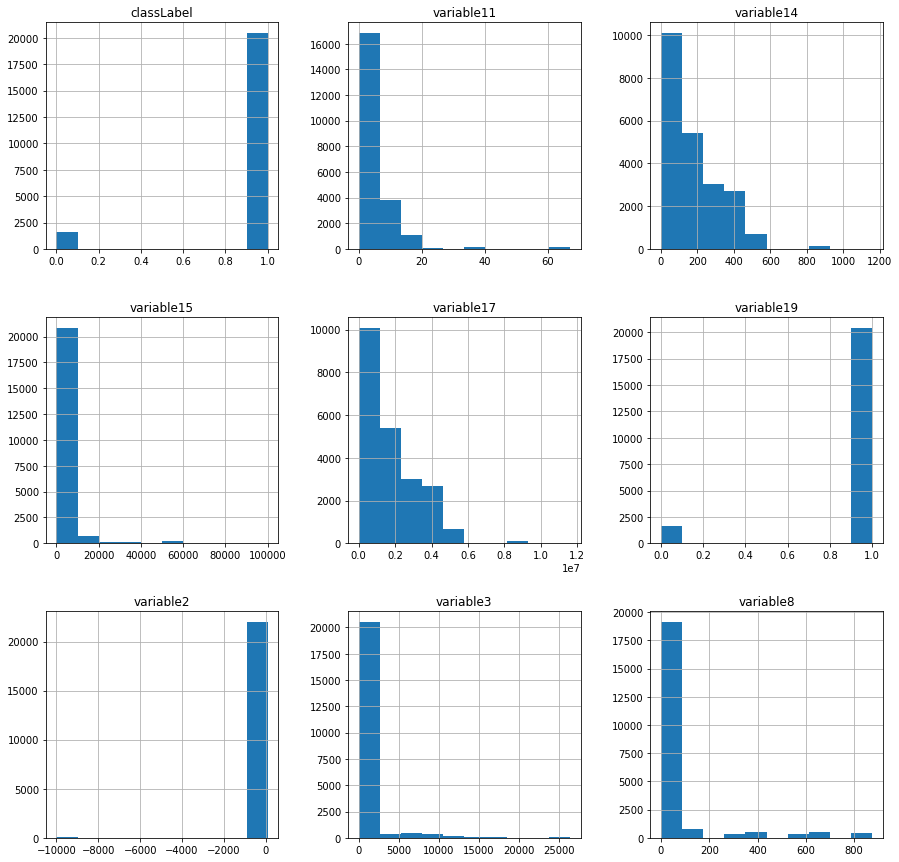

In [15]:
cleaned_data.hist(figsize=(15,15))

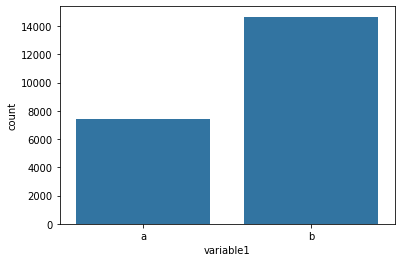

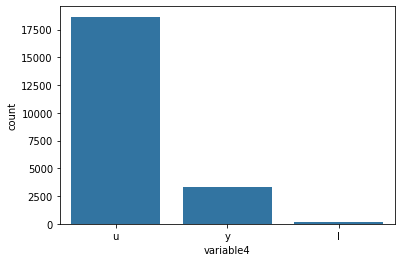

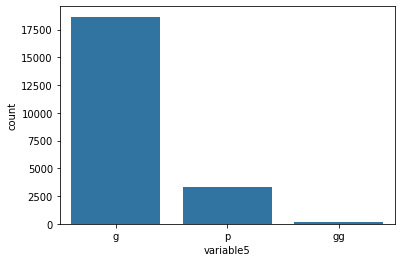

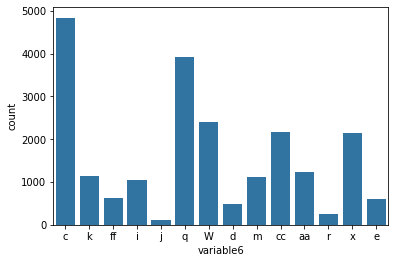

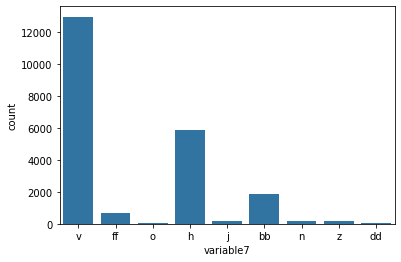

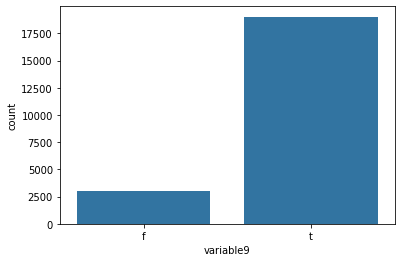

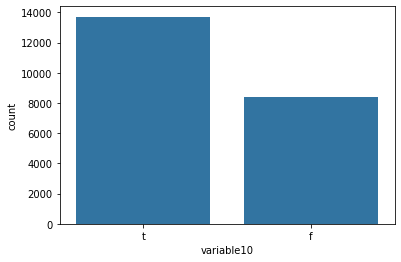

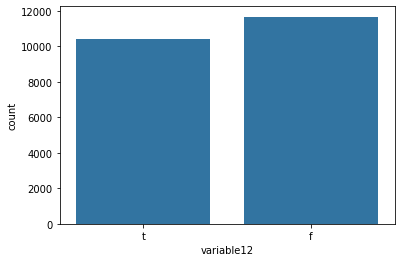

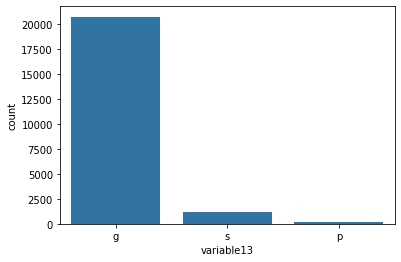

In [16]:
# Now let's look to categorical variables 
for col in categorical_columns : 
    sns.countplot(data=cleaned_data,x=col,color=sns.color_palette()[0])
    plt.show()

In [17]:
# let's look to correlation 
cleaned_data.corr()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel
variable2,1.000000,0.017943,0.024043,0.036763,0.031982,0.010698,0.031982,0.020943,0.020943
variable3,0.017943,1.000000,0.100541,-0.021031,0.025318,-0.053654,0.025318,0.021956,0.021956
variable8,0.024043,0.100541,1.000000,-0.028218,0.019274,-0.059716,0.019274,0.025765,0.025765
variable11,0.036763,-0.021031,-0.028218,1.000000,-0.149250,-0.013717,-0.149250,0.149700,0.149700
variable14,0.031982,0.025318,0.019274,-0.149250,1.000000,0.129573,1.000000,-0.053258,-0.053258
variable15,0.010698,-0.053654,-0.059716,-0.013717,0.129573,1.000000,0.129573,0.069847,0.069847
variable17,0.031982,0.025318,0.019274,-0.149250,1.000000,0.129573,1.000000,-0.053258,-0.053258
variable19,0.020943,0.021956,0.025765,0.149700,-0.053258,0.069847,-0.053258,1.000000,1.000000
classLabel,0.020943,0.021956,0.025765,0.149700,-0.053258,0.069847,-0.053258,1.000000,1.000000


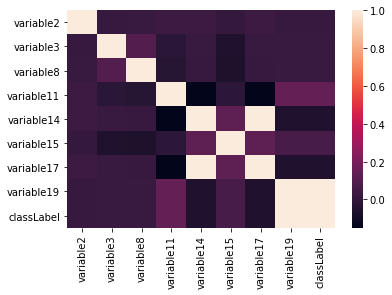

In [18]:
# Show The heatmap for correlation between columns 
sns.heatmap(cleaned_data.corr())

* variable 19 is perfectly correlated with our Target column (classLabel)  , that's important but we shouldn't count so much on that as this might change when examine more data (validation data or when testing)

Now let's encode categorical variables 

In [19]:
def encode_categorical(data,categorical_columns):
    encoded_columns=pd.DataFrame()
    for col in categorical_columns : 
        unique_values = []
        for item in data[col].unique(): 
            unique_values.append(col + item) 
        tmp = pd.get_dummies(data[col])
        tmp.columns = unique_values
        encoded_columns = pd.concat([encoded_columns,tmp],axis=1)
        
    return encoded_columns 


In [20]:
categorical_encoded = encode_categorical(cleaned_data,categorical_columns)

In [21]:
cleaned_data.drop(categorical_columns,axis=1,inplace=True)
cleaned_data = pd.concat([cleaned_data,categorical_encoded],axis=1)

In [22]:
cleaned_data.shape

(22076, 49)

In [23]:
cleaned_data.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel,variable1a,...,variable7dd,variable9f,variable9t,variable10t,variable10f,variable12t,variable12f,variable13g,variable13s,variable13p
0,17,5.00000,1,1,80.0,5,800000.0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
0,17,5.00000,75,1,80.0,5,800000.0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
0,17,0.00004,1,1,80.0,5,800000.0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
0,17,0.00004,75,1,80.0,5,800000.0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
0,92,5.00000,1,1,80.0,5,800000.0,0,0,1,...,0,1,0,0,1,0,1,1,0,0


Let's look again to the correlation 

In [24]:
cleaned_data.corr()['classLabel']

variable2      0.020943
variable3      0.021956
variable8      0.025765
variable11     0.149700
variable14    -0.053258
variable15     0.069847
variable17    -0.053258
variable19     1.000000
classLabel     1.000000
variable1a     0.043730
variable1b    -0.043730
variable4u     0.021662
variable4y     0.104678
variable4l    -0.110949
variable5g     0.104678
variable5p     0.021662
variable5gg   -0.110949
variable6c    -0.003257
variable6k    -0.009687
variable6ff    0.006854
variable6i     0.065540
variable6j    -0.050136
variable6q     0.010064
variable6W    -0.133994
variable6d    -0.082404
variable6m    -0.036647
variable6cc   -0.071383
variable6aa   -0.029339
variable6r     0.066787
variable6x     0.018508
variable6e     0.079263
variable7v     0.018533
variable7ff   -0.023819
variable7o    -0.128033
variable7h     0.061625
variable7j    -0.000788
variable7bb    0.012554
variable7n    -0.007984
variable7z    -0.023227
variable7dd    0.023011
variable9f    -0.558831
variable9t     0

# Prepare Test Data 

In [25]:
X_train = cleaned_data.drop(['classLabel'],axis=1)
y_train = cleaned_data['classLabel']

In [26]:
#load validataion data 
data_test = pd.read_csv('validation.csv',delimiter=';')
data_test.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [27]:
data_test['classLabel']=data_test['classLabel'].apply(lambda x : 0 if x=='no.' else 1)

In [28]:
test_clean = clean(data_test)

In [29]:
categorical_encoded = encode_categorical(test_clean,categorical_columns)
test_clean.drop(categorical_columns,axis=1,inplace=True)
test_clean = pd.concat([test_clean,categorical_encoded],axis=1)

In [30]:
X_test = test_clean.drop(['classLabel'],axis=1)
y_test = test_clean['classLabel']

In [31]:
print(X_train.shape)
print(X_test.shape)

(22076, 48)
(1268, 44)


In [32]:
# There is difference between train and test columns , let's see which columns in train not in test
diff=X_train.columns.difference(X_test.columns)
X_train.drop(diff,axis=1,inplace=True)

In [33]:
# order columns to avoid any mismatch between train and test 
X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_test  = X_test.reindex(sorted(X_test.columns), axis=1)

# Build Model 

In [34]:
model = XGBClassifier(random_state=0)

In [35]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred = model.predict(X_test)

Using F1 score as our metric because of class imbalance 

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
f1_score(y_test, y_pred, average='weighted')

0.48991113333846276

In [38]:
#view confusion matrix values 
def confusion_matrix_plot(y_test,y_pred):
    cm =confusion_matrix(y_test, y_pred).tolist()
    cm =  pd.DataFrame(cm, index=['0','1'], columns=['0','1'])
    ax = sns.heatmap(cm, cmap='Blues', annot=True,fmt="d")

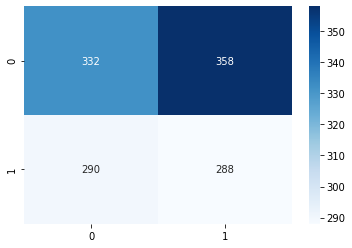

In [39]:
confusion_matrix_plot(y_test,y_pred)

In [40]:
# Let's try differnet model
from sklearn.svm import SVC
clf = SVC(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

In [ ]:
confusion_matrix_plot(y_test,y_pred)